In [37]:
import os,sys,glob
smodelsPath = os.path.expanduser('~/smodels')
sys.path.append(smodelsPath)
from smodels.theory.auxiliaryFunctions import rescaleWidth, unscaleWidth
import numpy as np
from scipy.interpolate import griddata
from trimRegularGrid import trimGrid,testTrimmedGrid,trim1D
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))
cm = plt.cm.get_cmap('RdYlBu')

### Trim grid using Delaunay triangulation

In [20]:
maxDiff=5e-2
minValue=1e-8
ds = SR = 'SR2FULL_150'
tx = 'THSCPM1b'

ntries = 1
gridSize = []
maxError = []
dataFile = '%s_eff_mutrig_%s.dat' %(tx,ds)
print('\n',dataFile)
valueLabel = ds
#Get data
data = np.genfromtxt(dataFile,names=True)
if 'width' in data.dtype.names:
    data['width'] = np.array([rescaleWidth(w) for w in data['width']])

xlabels = [x for x in data.dtype.names if not 'ctau' in x.lower() and not x == valueLabel]
xpts = np.array([list(x) for x in data[xlabels]])
ypts = data[valueLabel]        

for i in range(ntries):
    keepLines = trimGrid(xpts,ypts,maxDiff=maxDiff,minY=minValue,random=True)
    gridSize.append(len(keepLines))

    #Check Interpolation
    newData = data[keepLines]
    data_trim = [list(x) for x in newData[xlabels+[valueLabel]]]
    data_full = [list(x) for x in data[xlabels+[valueLabel]]]
    diffs = testTrimmedGrid(data_full,data_trim,minY=minValue)
    maxError.append(diffs.max())


 THSCPM1b_eff_mutrig_SR2FULL_150.dat


checking point 1536/1536 100%|||||||||||||||||||||||||||||||||||||Time: 0:00:00


Data successfully trimmed down to 82% (1253/1536) in 0.0 min
Maximum relative difference =  0.049951681014661756


### Trim data along width dimension

In [21]:
zlabel = 'width'
xlabels = [x for x in data.dtype.names if not 'ctau' in x.lower() and not x == valueLabel and not x == zlabel]
xpts = [list(x) for x in data[xlabels]]
ypts = data[valueLabel]
keepLines = trim1D(zpts,xpts,ypts,maxDiff=maxDiff,minY=minValue)

#Check Interpolation
newData2 = data[keepLines]
data_trim = [list(x) for x in newData2[xlabels+[zlabel,valueLabel]]]
data_full = [list(x) for x in data[xlabels+[zlabel,valueLabel]]]

diffs = testTrimmedGrid(data_full,data_trim,minY=minValue)


Data successfully trimmed down to 39% (594/1536) in 0.0 min
Maximum relative difference =  0.05325773444133752


In [22]:
print(len(newData),len(newData2))

1253 594


In [23]:
print(newData.dtype.names)

('mhscp', 'ctau', 'width', 'SR2FULL_150')


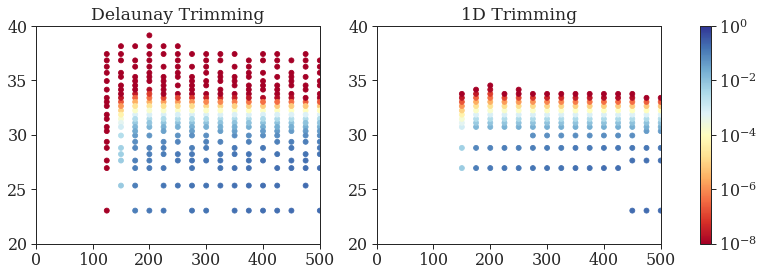

In [46]:
fig,ax = plt.subplots(ncols=2,figsize=(14,4))

ax[0].scatter(newData['mhscp'],newData['width'],c=newData[SR],s=25,cmap=cm, vmin=minValue,vmax=1.0,norm=LogNorm())
ax[0].set_title('Delaunay Trimming')
ax[0].set_xlim(0,500)
ax[0].set_ylim(20,40)

im = ax[1].scatter(newData2['mhscp'],newData2['width'],c=newData2[SR],s=25,cmap=cm, vmin=minValue,vmax=1.0,norm=LogNorm())
ax[1].set_title('1D Trimming')
ax[1].set_xlim(0,500)
ax[1].set_ylim(20,40)


fig.colorbar(im, ax=ax)
plt.show()

In [42]:
xpts = [list(x) for x in newData[['mhscp','width']]]
x_interp = [list(x) for i,x in enumerate(data[['mhscp','width']])]
y_interp = griddata(xpts,newData[SR],x_interp)

In [43]:
xpts = [list(x) for x in newData2[['mhscp','width']]]
y_interp2 = griddata(xpts,newData2[SR],x_interp)

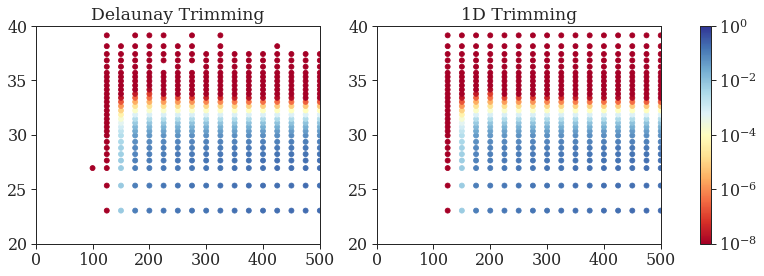

In [47]:
fig,ax = plt.subplots(ncols=2,figsize=(14,4))

ax[0].scatter(data['mhscp'],data['width'],c=y_interp,s=25,cmap=cm, vmin=minValue,vmax=1.0,norm=LogNorm())
ax[0].set_title('Delaunay Trimming')
ax[0].set_xlim(0,500)
ax[0].set_ylim(20,40)


im = ax[1].scatter(data['mhscp'],data['width'],c=y_interp2,s=25,cmap=cm, vmin=minValue,vmax=1.0,norm=LogNorm())
ax[1].set_title('1D Trimming')
ax[1].set_xlim(0,500)
ax[1].set_ylim(20,40)


fig.colorbar(im, ax=ax)
plt.show()